I590 - Applied Data Science

Analysis using Python

Created by Vivek Vijayaraghavan

Date: 04/04/2019

Objective: Code Portfolio for Analysis using python

# Data Analysis using Python

## Overview
Python is an intuitive, beginner-friendly, general-purpose programming language. Unfortunately, because it is a general-purpose language, it lacks out-of-the-box and easy-to-use functionality for data processing and analysis that analysts can use without effort. Because of this, data analysts use Python modules designed specifically to extend Python's base functionality when doing data analysis. One of the modules that will be used extensively is [Pandas](http://pandas.pydata.org/) (short for Python for Data Analysis), which is a module designed around providing flexible data structures and data manipulation in Python. Specifically, Pandas uses the concept of a data frame.

Data cleaning and exploratory analysis are often the preliminary steps to carry out when confronted with the challenge of extracting useful insights from data. Exploring data prior to doing any deeper analysis allows you to answer questions about data quality. The following sections demonstrate how to use Pandas, and related Python operations, to understand data quality.

## Pre-Requisites

In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import requests
import io
import random
random.random()
import datetime
import folium
import geocoder
import pyreadr
import seaborn as sns

from os import path
from matplotlib.pyplot import figure, show, rc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.mlab as mlab
import json
from tqdm import tqdm

# Set plotting options.
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## References
 - [Pandas](http://pandas.pydata.org/)
 - [data frame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)
 - [Datacamp Supervised Learning](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn)

# Supervised Learning with scikit-learn
The value of Data Scientists rests on their ability to describe the world and to make predictions. Machine Learning is the field of teaching machines and computers to learn from existing data to make predictions on new data - will a given tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam or not? 

We will focus on how to use Python to perform supervised learning, an essential component of Machine Learning. We will explore on how to build predictive models, how to tune their parameters and how to tell how well they will perform on unseen data, all the while using real world datasets. We will use one of the most popular and user-friendly machine learning libraries for Python - scikit-learn

## Classification
Classification problems are prevalent in a variety of domains, ranging from finance to healthcare. Here, you will have the chance to apply what you are learning to a political dataset, where you classify the party affiliation of United States Congressmen based on their voting records.

### Supervised Learning
In Supervised learning, we have several datapoints or samples that are described using predictor variables (features) and a target variable (response). Most often, the data is represented in a table structure where rows represent the datapoints and columns represent features. The aim of supervised learning is to predict the target variable given the predictor variables. If the target variables can be categorized (spam / non spam, true / false, type of color, types of species etc), then the supervised learning technique is called Classification.

Listed below is the iris dataset that is a builtin dataset in R that is loaded here.

In [5]:
# Iris dataset
result = pyreadr.read_r('./data/iris.RData') # also works for Rds

# done! let's see what we got
# result is a dictionary where keys are the name of objects and the values python
# objects
print(result.keys()) # let's check what objects we got
iris = result["iris"] # extract the pandas data frame for object df1
iris.head()

odict_keys(['iris', 'iris.wide', 'iris.wide2', 'iris.tidy'])


Species  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0  setosa           5.1          3.5           1.4          0.2
1  setosa           4.9          3.0           1.4          0.2
2  setosa           4.7          3.2           1.3          0.2
3  setosa           4.6          3.1           1.5          0.2
4  setosa           5.0          3.6           1.4          0.2

### Exploratory Data Analysis

In [19]:
# An alternate way to load the iris dataset is through scilearn datasets..
from sklearn import datasets
iris_raw = datasets.load_iris()
type(iris_raw)

sklearn.utils.Bunch

In [20]:
# Print Iris keys and understand the datatype of data..
print(iris_raw.keys())
type(iris_raw.data), type(iris_raw.target)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


(numpy.ndarray, numpy.ndarray)

In [21]:
# Understand the rows and columns using shape...
iris_raw.data.shape

(150, 4)

In [22]:
# Understand the target data..
iris_raw.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
# Getting the feature and target data into a dataframe...
X = iris_raw.data
Y = iris_raw.target
iris = pd.DataFrame(X, columns = iris_raw.feature_names)
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22980fd0>,
      dtype=object)

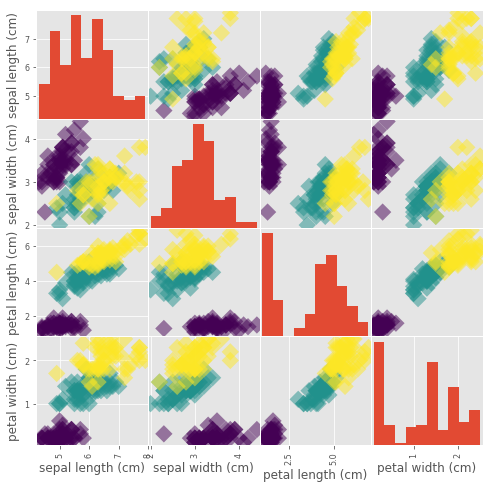

In [27]:
# Let us visualize the data..
pd.scatter_matrix(iris, c=Y, figsize=[8,8],s=150,marker='D')

It can be observed from the above as part of Explaratory Data Analysis that the Petal Length and Petal Width are highly correlated to the Species of the flower... 

Let us try with another example, where we can try to answer the question - Which of the initiatives (eduction, satellite or missile) did the democrats vote overwhelmingly Yes...

In [32]:
# Reading a csv file with headers
votes = pd.read_csv("./data/house-votes-84.csv")
votes.columns = ["party", "infants", "water", "budget", "physician", "salvador", 
                 "religious", "satellite", "aid", "missile", "immigration", "synfuels", 
                 "education", "superfund", "crime", "duty_free_exports", "eaa_rsa"]
votes.head()

party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1    democrat       ?     y      y         ?        y         y         n   n   
2    democrat       n     y      y         n        ?         y         n   n   
3    democrat       y     y      y         n        y         y         n   n   
4    democrat       n     y      y         n        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       n           n        n         y         y     y                 n   
1       n           n        y         n         y     y                 n   
2       n           n        y         n         y     n                 n   
3       n           n        y         ?         y     y                 y   
4       n           n        n         n         y     y                 y   

  eaa_rsa  
0       ?  
1       n  
2       y  
3       y  
4       y

<Figure size 720x576 with 0 Axes>

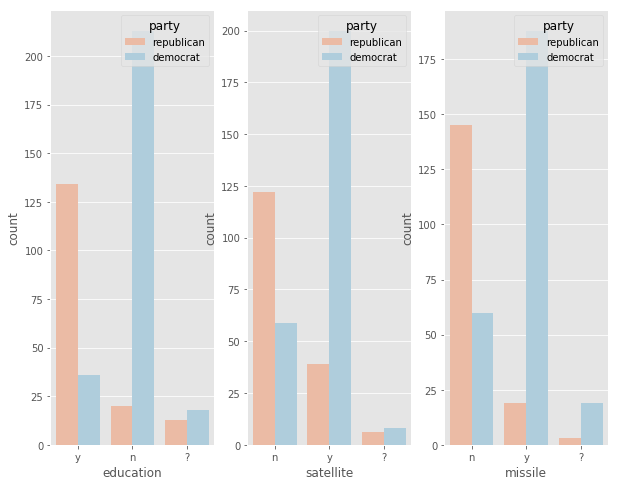

In [45]:
# Now plot the three initiatives side by side to see which one matches the answer to the question of interest...
plt.tight_layout()
fig, ax =plt.subplots(1,3)
sns.countplot(x='education', hue='party', data=votes, palette='RdBu', ax=ax[0])
sns.countplot(x='satellite', hue='party', data=votes, palette='RdBu', ax=ax[1])
sns.countplot(x='missile', hue='party', data=votes, palette='RdBu', ax=ax[2])


### K-Nearest Neighbors
The basic idea of this type of classifier is to predict the label of the datapoint by looking at the "k" closest labelled datapoints and then getting them to vote on what label should the unlabelled dtaapoint should have. All machine learning models scikit-learn are implemented as python classes. They implement the algorithm for learning and predicting the model as well as store all the information that they have learned from the data.

Training a model on the data is also called fitting and we use the fit() method. Similarly, the predict() method is used to predict the label from the test data. We will see an example below...

In [54]:
# K-nn classifier in python
# using iris dataset...
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris_raw['data'], iris_raw['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [55]:
# Create unlabelled data set (test data) that we will use to predict the Species..
iris_test = np.array([(5.2,3.4,1.2,0.1), (5.0,3.5,5.7,2.3) , (4.9,3.1,3.2,0.9)])

# Use the predict function...
prediction = knn.predict(iris_test)

In [56]:
# Understand the shape of test data
iris_test.shape


(3, 4)

In [57]:
# understand the shape of target data
prediction.shape

(3,)

In [58]:
print('Prediction{}:'.format(prediction))

Prediction[0 2 1]:


In [99]:
# Another example with the voting data previously loaded...
# to highlight the fit method..
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
# Make sure to convert y/n to 1/0
votes.replace(('y', 'n', ''), (1, 0, np.nan), inplace=True)
votes1 = votes.dropna()

y = votes1['party'].values
X = votes1.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Use the prediction function on train data
party_pred = knn.predict(X)

X_new = np.array([(pd.DataFrame(np.random.rand(1,16)))])

# Now we are ready to predict on test data..
party_pred_new = knn.predict(X_new)
print("Prediction: {}".format(party_pred_new))

Prediction: ['republican']


### Evaluating Model Performance

### Overfitting & Underfitting

## Regression

## Finetuning the Model

## Pre-Processing & Pipelines